# 무임승차인원 예측 (제기역 한정_zegi.csv)

In [153]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


df = pd.read_csv('zegi_train.csv')
df.loc[df['호선명']=='1호선', '호선명'] = 1
df.head()

x_data = df[['사용월']]
#_data = df.drop(['사용월'], axis=1)

y_data = df[['무임승차인원']]

#202501월 - 272662명 - 54%
#정확도는 높으나 결과값이 오버피팅되어 잘못 예측
"""model3 = make_pipeline(PolynomialFeatures(2),LinearRegression())
model3.fit(x_data,y_data)
print("train set accuracy:", model3.score(x_data,y_data)) #정확도 측정"""

#202501월 - 434044명 - 52%
lr = LinearRegression().fit(x_data, y_data)
predict_acc="약 "+str(int(round(lr.score(x_data,y_data)*100)))+"%"
print("예측값의 신뢰도:", predict_acc) #정확도 측정

predict_when_list=[]
predict_result_list=[]
for tmp in range(202001,203013,1):
    tmp=str(tmp)
    if int(tmp[4:6]) > 12 or tmp[4:6] == '00':
        continue
    else:
        tmp_list=lr.predict([[int(tmp)]])
        predict_result=str(int(round(tmp_list[0][0])))
        if tmp[4] == '1':
            print(tmp[0:4],"년 ",tmp[4:7],"월 제기역의 무임승차인원 예측값 : ",predict_result+"명")
            predict_when_list.append(tmp)
            predict_result_list.append(predict_result)
        else:
            print(tmp[0:4],"년 ",tmp[5:7],"월 제기역의 무임승차인원 예측값 : ",predict_result+"명")
            predict_when_list.append(tmp)
            predict_result_list.append(predict_result)


예측값의 신뢰도: 약 54%
2020 년  1 월 제기역의 무임승차인원 예측값 :  357663명
2020 년  2 월 제기역의 무임승차인원 예측값 :  357813명
2020 년  3 월 제기역의 무임승차인원 예측값 :  357964명
2020 년  4 월 제기역의 무임승차인원 예측값 :  358115명
2020 년  5 월 제기역의 무임승차인원 예측값 :  358266명
2020 년  6 월 제기역의 무임승차인원 예측값 :  358417명
2020 년  7 월 제기역의 무임승차인원 예측값 :  358567명
2020 년  8 월 제기역의 무임승차인원 예측값 :  358718명
2020 년  9 월 제기역의 무임승차인원 예측값 :  358869명
2020 년  10 월 제기역의 무임승차인원 예측값 :  359020명
2020 년  11 월 제기역의 무임승차인원 예측값 :  359170명
2020 년  12 월 제기역의 무임승차인원 예측값 :  359321명
2021 년  1 월 제기역의 무임승차인원 예측값 :  372741명
2021 년  2 월 제기역의 무임승차인원 예측값 :  372891명
2021 년  3 월 제기역의 무임승차인원 예측값 :  373042명
2021 년  4 월 제기역의 무임승차인원 예측값 :  373193명
2021 년  5 월 제기역의 무임승차인원 예측값 :  373344명
2021 년  6 월 제기역의 무임승차인원 예측값 :  373494명
2021 년  7 월 제기역의 무임승차인원 예측값 :  373645명
2021 년  8 월 제기역의 무임승차인원 예측값 :  373796명
2021 년  9 월 제기역의 무임승차인원 예측값 :  373947명
2021 년  10 월 제기역의 무임승차인원 예측값 :  374098명
2021 년  11 월 제기역의 무임승차인원 예측값 :  374248명
2021 년  12 월 제기역의 무임승차인원 예측값 :  374399명
2022 년  1 월 제기역의 무임승차인원 예측값 :  387818명
202

In [104]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula = '사용월~무임승차인원', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    사용월   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     19.51
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           8.39e-05
Time:                        15:34:52   Log-Likelihood:                -219.39
No. Observations:                  39   AIC:                             442.8
Df Residuals:                      37   BIC:                             446.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.01e+05    157.737   1274.329      0.000    2.01e+05    2.01e+05
무임승차인원         0.0022      0.000      4.418      0.000       0.001       0.003
==============================================================================
Omnibus:                        3.657   Durbin-Watson:                   0.779
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                1.629
Skew:                           0.039   Prob(JB):                        0.443
Kurtosis:                       2.002   Cond. No.                     4.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 년도별 무임승차인원 시각화

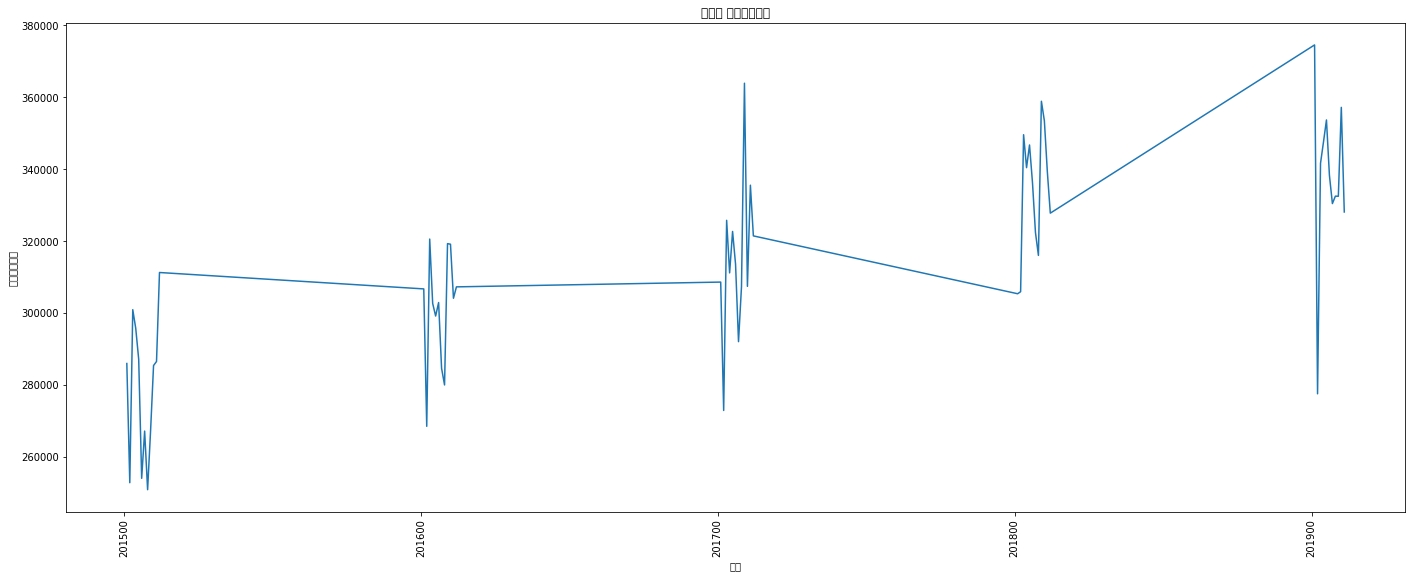

In [96]:
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
plt.figure(figsize=(24,9))
plt.xticks(rotation = 90)
plt.plot(x_data,y_data)
plt.title("년도별 무임승차인원")
plt.xlabel("년도")
plt.ylabel("무임승차인원")

plt.show()

# 무임승차인원 예측 ( 2020~2030 )

C:\Users\Linho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Linho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Linho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Linho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Linho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Linho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49849 missing from c

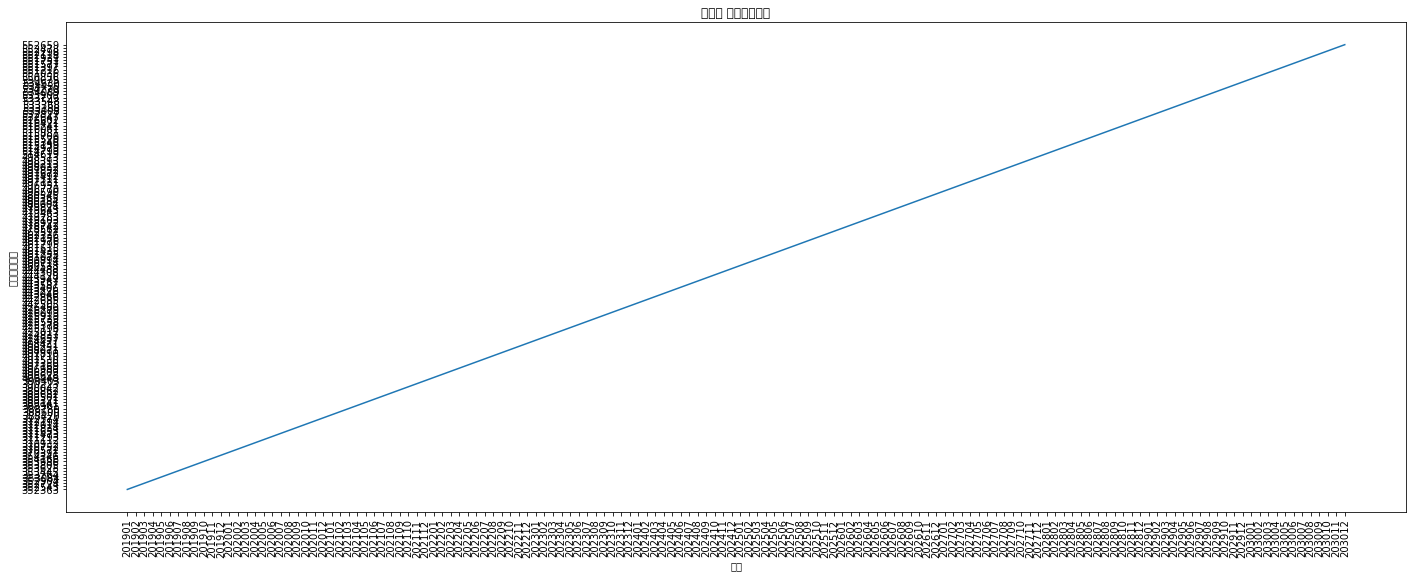

In [88]:
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
plt.figure(figsize=(24,9))
plt.xticks(rotation = 90)
plt.plot(predict_when_list,predict_result_list)
plt.title("년도별 무임승차인원")
plt.xlabel("년도")
plt.ylabel("무임승차인원")

plt.show()

# 메인코딩

### 역번호를 통한 역이름 출력

In [177]:
import openpyxl

xlsx_file = openpyxl.load_workbook('station_number.xlsx')
station_sheet = xlsx_file.active
 
station_number = [] #역번호가 담긴 list
station_name = [] #역이름이 담긴 list

for row in station_sheet.rows:
    station_number.append(row[0].value)
    station_name.append(row[1].value)
    
print(station_name[station_number.index(0)]) #번호로 역이름 검색

종각


### 노선번호를 통한 노선명 출력

In [178]:
import openpyxl

xlsx_file = openpyxl.load_workbook('line_number.xlsx')
line_sheet = xlsx_file.active
 
line_number = [] #역번호가 담긴 list
line_name = [] #역이름이 담긴 list

for row in line_sheet.rows:
    line_number.append(row[0].value)
    line_name.append(row[1].value)
    
print(line_name[station_number.index(0)]) #번호로 노선명 검색

우이신설선


### 데이터 전처리

In [195]:
import pandas as pd


df = pd.read_csv('main_data.csv', encoding = 'utf-8')
for name in line_name:
    if(name=="역명" or name==None):
        continue
    df.loc[df['line']==name, 'line'] = int(line_number[line_name.index(name)])
    
for name in station_name:
    if(name=="역명" or name==None):
        continue
    df.loc[df['name']==name, 'name'] = int(station_number[station_name.index(name)])
    
df.values.tolist() 


[[201911, 1, 0, 1163679, 171637, 1125351, 162796],
 [201911, 1, 1, 553620, 278314, 568556, 266901],
 [201911, 1, 2, 642078, 379915, 605270, 353918],
 [201911, 1, 3, 181957, 152029, 197668, 154876],
 [201911, 1, 4, 285598, 328094, 276321, 350312],
 [201911, 1, 5, 368623, 125450, 360324, 119589],
 [201911, 1, 6, 1556332, 229539, 1473411, 223666],
 [201911, 1, 7, 309970, 137022, 347952, 141381],
 [201911, 1, 8, 446561, 314880, 464202, 322778],
 [201911, 1, 9, 708547, 123715, 727205, 125736],
 [201911, 2, 10, 567258, 62404, 455299, 52928],
 [201911, 2, 11, 1439530, 206093, 1388492, 197139],
 [201911, 2, 12, 627631, 158333, 561090, 158544],
 [201911, 2, 13, 640285, 100663, 620907, 100746],
 [201911, 2, 14, 551102, 86686, 570187, 86283],
 [201911, 2, 15, 1257498, 101735, 1386494, 105979],
 [201911, 2, 16, 275003, 67543, 263414, 66953],
 [201911, 2, 17, 815654, 118013, 774844, 119827],
 [201911, 2, 18, 29968, 7844, 31984, 8255],
 [201911, 2, 19, 362590, 103063, 376966, 105587],
 [201911, 2, 2

# 무임승차 예측모델

In [126]:
import pandas as pd
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

df = pd.read_csv('tmp3.csv', encoding = 'utf-8')

x_data = df[['year/month']]
y_data = df[['free_take_on']]

#202501월 - 272662명 - 54%
#정확도는 높으나 결과값이 오버피팅되어 잘못 예측
"""model3 = make_pipeline(PolynomialFeatures(3),LinearRegression())
model3.fit(x_data,y_data)
print("train set accuracy:", model3.score(x_data,y_data)) #정확도 측정
model3.predict([[202503]])"""

lr = LinearRegression().fit(x_data, y_data)
predict_acc="약 "+str(int(round(lr.score(x_data,y_data)*100)))+"%"
print("예측값의 신뢰도:", predict_acc) #정확도 측정

predict_when_list1=[]
predict_result_list1=[]
for tmp in range(202001,203013,1):
    tmp=str(tmp)
    if int(tmp[4:6]) > 12 or tmp[4:6] == '00':
        continue
    else:
        tmp_list=model3.predict([[int(tmp)]])
        predict_result=str(int(round(tmp_list[0][0])))
        if tmp[4] == '1':
            print(tmp[0:4],"년 ",tmp[4:7],"월 1호선의 무임승차인원 예측값 : ",predict_result+"명")
            predict_when_list1.append(tmp)
            predict_result_list1.append(predict_result)
        else:
            print(tmp[0:4],"년 ",tmp[5:7],"월1호선의 무임승차인원 예측값 : ",predict_result+"명")
            predict_when_list1.append(tmp)
            predict_result_list1.append(predict_result)


예측값의 신뢰도: 약 2%
2020 년  1 월1호선의 무임승차인원 예측값 :  1387160544명
2020 년  2 월1호선의 무임승차인원 예측값 :  1387160539명
2020 년  3 월1호선의 무임승차인원 예측값 :  1387160535명
2020 년  4 월1호선의 무임승차인원 예측값 :  1387160531명
2020 년  5 월1호선의 무임승차인원 예측값 :  1387160527명
2020 년  6 월1호선의 무임승차인원 예측값 :  1387160523명
2020 년  7 월1호선의 무임승차인원 예측값 :  1387160519명
2020 년  8 월1호선의 무임승차인원 예측값 :  1387160515명
2020 년  9 월1호선의 무임승차인원 예측값 :  1387160511명
2020 년  10 월 1호선의 무임승차인원 예측값 :  1387160507명
2020 년  11 월 1호선의 무임승차인원 예측값 :  1387160503명
2020 년  12 월 1호선의 무임승차인원 예측값 :  1387160498명
2021 년  1 월1호선의 무임승차인원 예측값 :  1387160134명
2021 년  2 월1호선의 무임승차인원 예측값 :  1387160130명
2021 년  3 월1호선의 무임승차인원 예측값 :  1387160126명
2021 년  4 월1호선의 무임승차인원 예측값 :  1387160121명
2021 년  5 월1호선의 무임승차인원 예측값 :  1387160117명
2021 년  6 월1호선의 무임승차인원 예측값 :  1387160113명
2021 년  7 월1호선의 무임승차인원 예측값 :  1387160109명
2021 년  8 월1호선의 무임승차인원 예측값 :  1387160105명
2021 년  9 월1호선의 무임승차인원 예측값 :  1387160101명
2021 년  10 월 1호선의 무임승차인원 예측값 :  1387160097명
2021 년  11 월 1호선의 무임승차인원 예측값 :  1387160093명
2021 년  1

In [40]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

z_data = df[['사용월','무임승차인원']]
model = smf.ols(formula = '사용월 ~ 무임승차인원', data = z_data)
result = model.fit()
result.summary()
df

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원
0,201911,1,종각,1163679,171637,1125351,162796
1,201911,1,종로5가,553620,278314,568556,266901
2,201911,1,종로3가,642078,379915,605270,353918
3,201911,1,동묘앞,181957,152029,197668,154876
4,201911,1,제기동,285598,328094,276321,350312
...,...,...,...,...,...,...,...
23087,201501,2,왕십리,528644,459377,55647,48556
23088,201501,2,건대입구,1242112,1372098,94803,100837
23089,201501,2,성수,621629,685163,93954,95628
23090,201501,2,뚝섬,370286,392134,62871,63682
